In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set_style('whitegrid')

### Get the Data

In [4]:
train = pd.read_csv('titanic_train.csv')

In [6]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Analysis

##### Missing Data

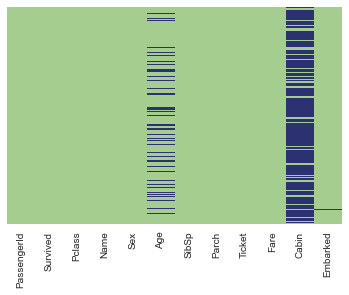

In [8]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap='crest')
plt.savefig('missingdata.png',bbox_inches='tight')

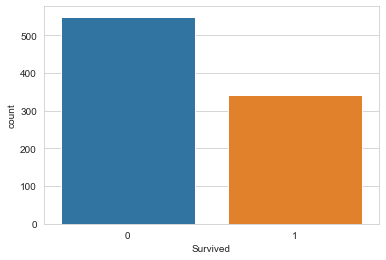

In [9]:
# Survived passengers
sns.countplot(data=train,x='Survived')
plt.savefig('survived.png',bbox_inches='tight')

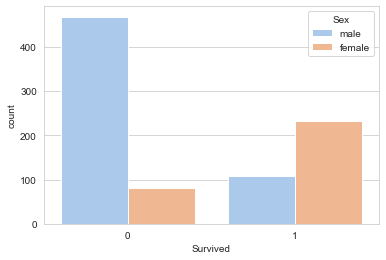

In [10]:
sns.countplot(data=train,x='Survived',hue='Sex',palette='pastel')
plt.savefig('survived-hue.png',bbox_inches='tight')

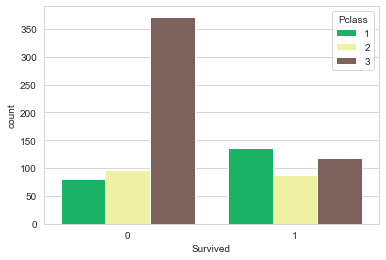

In [11]:
sns.countplot(data=train,x='Survived',hue='Pclass',palette='terrain')
plt.savefig('survived-pclass.png',bbox_inches='tight')

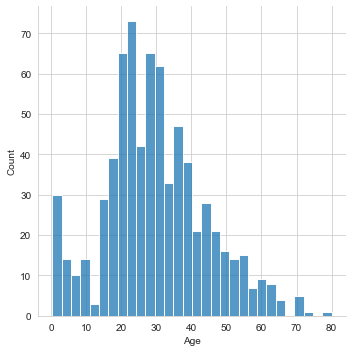

In [12]:
# Checking common Age group
sns.displot(train['Age'].dropna(),kde=False,bins=30)
plt.savefig('agegroup.png',bbox_inches='tight')

In [13]:
import cufflinks as cf
cf.go_offline()

In [17]:
# Checking Ticket Fare
train['Fare'].iplot(kind='hist',bins=30)
#plt.savefig('ticketfare.png',bbox_inches='tight')

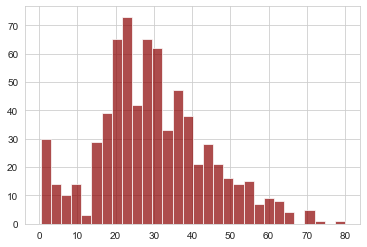

In [21]:
#sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=30)
train['Age'].hist(bins=30,color='darkred',alpha=0.7)
plt.savefig('age-histplot.png',bbox_inches='tight')

In [22]:
# Checking Sibling/Spouse count
train['SibSp'].iplot(kind='hist',bins=30,color='red')

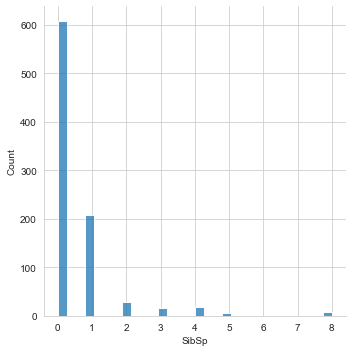

In [23]:
sns.displot(train['SibSp'].dropna(),kde=False,bins=30)
plt.savefig('SibSp-histplot.png',bbox_inches='tight')

### Data Cleaning

In [24]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

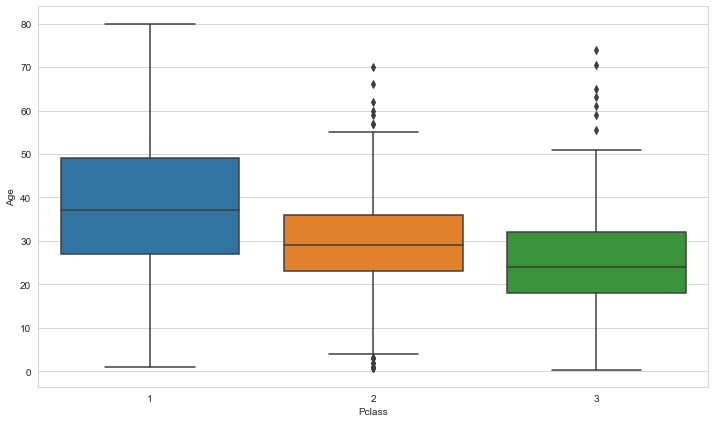

In [25]:
plt.figure(figsize=(12,7))
sns.boxplot(data=train, x='Pclass', y='Age')
plt.savefig('pclassBoxPlot.png',bbox_inches='tight')

In [26]:
# Fill the Age missing columns
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [27]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

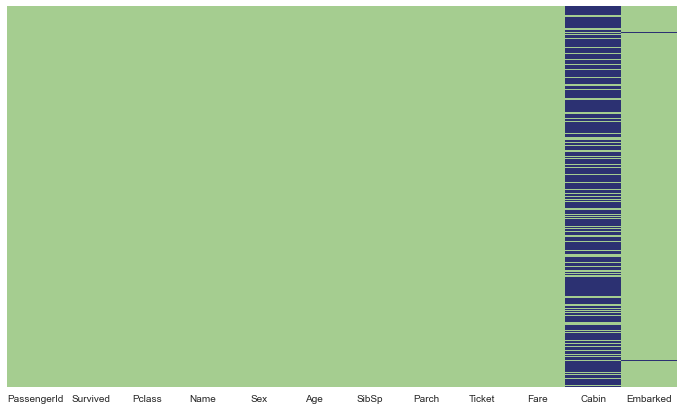

In [28]:
plt.figure(figsize=(12,7))
sns.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap='crest')
plt.savefig('cabinMissingData.png',bbox_inches='tight')

In [29]:
train.drop('Cabin',axis=1,inplace=True)

In [30]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


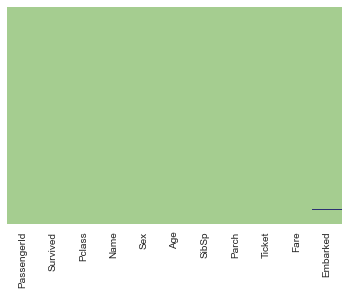

In [31]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap='crest')
plt.savefig('finalMissingData.png',bbox_inches='tight')

In [32]:
train.dropna(inplace=True)

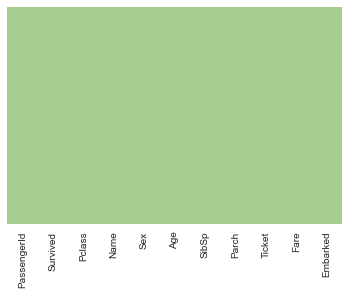

In [33]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap='crest')
plt.savefig('CleanData.png',bbox_inches='tight')

In [34]:
# Column Sex is categorical so create a dummy column
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex.head(2)

,male
0,1
1,0


In [35]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark.head(2)

,Q,S
0,0,1
1,0,0


In [36]:
train = pd.concat([train,sex,embark],axis=1)

In [37]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [38]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [39]:
train.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [40]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [41]:
train.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Building a Logistic Regression model

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

### Training & Testing Data

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\vrras\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [46]:
predictions = logmodel.predict(X_test)

### Evaluation

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y_test,predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)